C:\Users\obisa\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


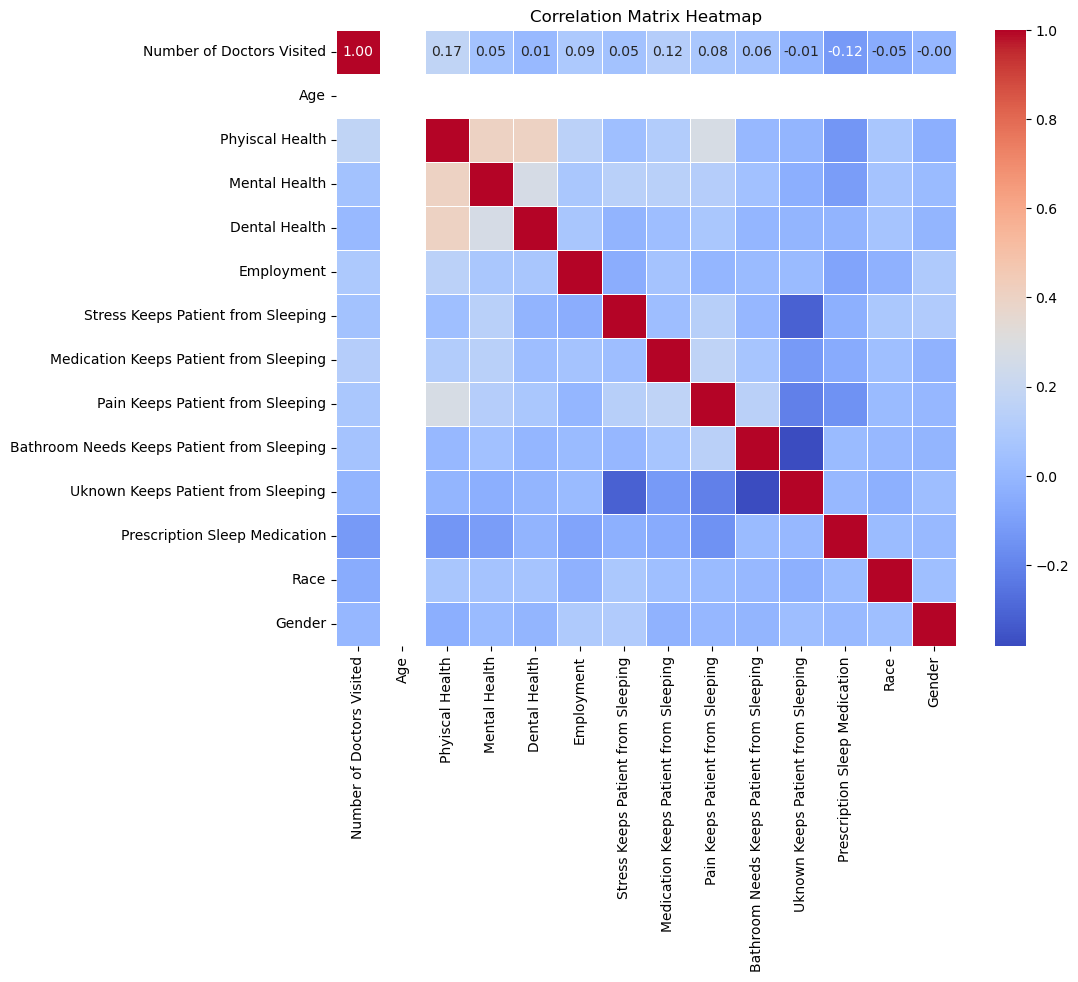

C:\Users\obisa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\obisa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Random Forest Accuracy: 0.5302325581395348
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.15      0.24        20
           2       0.46      0.36      0.40        87
           3       0.56      0.74      0.64       108

    accuracy                           0.53       215
   macro avg       0.54      0.42      0.43       215
weighted avg       0.52      0.53      0.51       215


Logistic Regression Accuracy: 0.5674418604651162
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.20      0.31        20
           2       0.51      0.36      0.42        87
           3       0.59      0.81      0.68       108

    accuracy                           0.57       215
   macro avg       0.59      0.45      0.47       215
weighted avg       0.56      0.57      0.54       215


Support Vector Machine Accuracy: 0.5441860465116279
Support Ve

C:\Users\obisa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
data = pd.read_csv("NPHA-doctor-visits.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Preprocessing
# Drop any rows with missing values
data.dropna(inplace=True)

# Define features and target variable
X = data.drop(columns=['Trouble Sleeping'])  # Features
y = data['Trouble Sleeping']  # Target variable

# Visualization and Feature Selection
# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select features with highest correlation with the target variable
selector = SelectKBest(f_classif, k=3)  # Select top 3 features
X_new = selector.fit_transform(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Model Selection and Training
# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifiers
rf_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Evaluation
# Predictions
rf_pred = rf_classifier.predict(X_test)
lr_pred = lr_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Classification Reports
rf_report = classification_report(y_test, rf_pred)
lr_report = classification_report(y_test, lr_pred)
svm_report = classification_report(y_test, svm_pred)

# Print Results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", lr_report)

print("\nSupport Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:\n", svm_report)


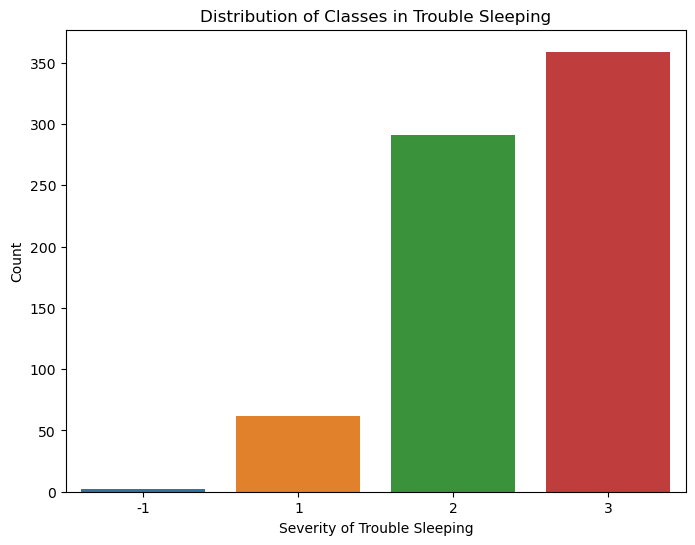

Correlation Matrix:
                                            Number of Doctors Visited  Age  \
Number of Doctors Visited                                    1.000000  NaN   
Age                                                               NaN  NaN   
Phyiscal Health                                              0.169629  NaN   
Mental Health                                                0.049990  NaN   
Dental Health                                                0.009371  NaN   
Employment                                                   0.092578  NaN   
Stress Keeps Patient from Sleeping                           0.053040  NaN   
Medication Keeps Patient from Sleeping                       0.120549  NaN   
Pain Keeps Patient from Sleeping                             0.081990  NaN   
Bathroom Needs Keeps Patient from Sleeping                   0.056043  NaN   
Uknown Keeps Patient from Sleeping                          -0.014095  NaN   
Trouble Sleeping                            

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of classes in the "Trouble Sleeping" column
plt.figure(figsize=(8, 6))
sns.countplot(x='Trouble Sleeping', data=data)
plt.title('Distribution of Classes in Trouble Sleeping')
plt.xlabel('Severity of Trouble Sleeping')
plt.ylabel('Count')
plt.show()

# Calculate correlation matrix
corr_matrix = data.corr()

# List correlation matrix features with their values
print("Correlation Matrix:")
print(corr_matrix)
